In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("census_data.csv")

In [3]:
data.head(20)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
import seaborn as sb

In [5]:
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

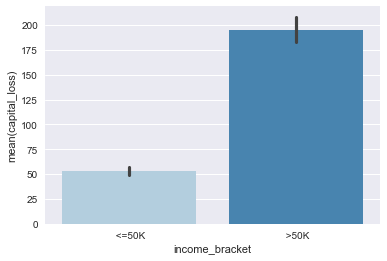

In [6]:
%matplotlib inline
sb.barplot(x="income_bracket",y="capital_loss", data=data, palette="Blues")

In [7]:
data_corelation=data.corr()

In [8]:
data_corelation

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education_num,0.036527,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000


In [9]:
data['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [11]:
data['income_bracket'] = data['income_bracket'].apply(label_fix)

In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = data.drop('income_bracket',axis=1)
y = data['income_bracket']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [15]:
import tensorflow as tf
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)
#https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list

In [16]:
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")
#https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column

In [17]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

In [18]:
feat_cols

[_VocabularyListCategoricalColumn(key='gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _HashedCategoricalColumn(key='occupation', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='marital_status', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='relationship', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='education', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='workclass', hash_bucket_size=1000, dtype=tf.string),
 _HashedCategoricalColumn(key='native_country', hash_bucket_size=1000, dtype=tf.string),
 _NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='education_num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='capital_gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='capital_l

In [29]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=10,shuffle=True)
#https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn

In [30]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nisha\\AppData\\Local\\Temp\\tmpe3u9tm95', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E611BB08D0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
model.train(input_fn=input_func,steps=7000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\nisha\AppData\Local\Temp\tmpe3u9tm95\model.ckpt-2280
INFO:tensorflow:Saving checkpoints for 2281 into C:\Users\nisha\AppData\Local\Temp\tmpe3u9tm95\model.ckpt.
INFO:tensorflow:loss = 220.668, step = 2281
INFO:tensorflow:global_step/sec: 214.482
INFO:tensorflow:loss = 63.3127, step = 2381 (0.470 sec)
INFO:tensorflow:global_step/sec: 373.535
INFO:tensorflow:loss = 239.959, step = 2481 (0.267 sec)
INFO:tensorflow:global_step/sec: 370.759
INFO:tensorflow:loss = 172.159, step = 2581 (0.271 sec)
INFO:tensorflow:global_step/sec: 385.073
INFO:tensorflow:loss = 37.8519, step = 2681 (0.260 sec)
INFO:tensorflow:global_step/sec: 369.384
INFO:tensorflow:loss = 42.0924, step = 2781 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.31
INFO:tensorflow:loss = 175.551, step = 2881 (0.274 sec)
INFO:tensorflow:global_step/sec: 361.372
INFO:tensorflow:loss = 65.3826, step = 2981 (0.279 sec)
INFO:tensorflow:global_

In [39]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [40]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Restoring parameters from C:\Users\nisha\AppData\Local\Temp\tmpe3u9tm95\model.ckpt-4560


In [41]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [42]:
final_preds[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90      7490
          1       0.67      0.65      0.66      2279

avg / total       0.84      0.85      0.84      9769



In [46]:
#DenseNeuralne
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nisha\\AppData\\Local\\Temp\\tmp04bdfhhx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E60FB3A3C8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
gender = tf.feature_column.embedding_column(gender, dimension=2)

In [ ]:
occupation = tf.feature_column.embedding_column(occupation, hash_bucket_size=1000)
marital_status = tf.feature_column.embedding_column(marital_status, hash_bucket_size=1000)
relationship = tf.feature_column.embedding_column(relationship, hash_bucket_size=1000)
education = tf.feature_column.embedding_column(education, hash_bucket_size=1000)
workclass = tf.feature_column.embedding_column(workclass, hash_bucket_size=1000)
native_country = tf.feature_column.embedding_column(native_country, hash_bucket_size=1000)
#Still working on converting feature columns to embedding columns